## Get some ML model going
## Start with loading cleansed data

In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [27]:
data=pd.read_csv('AmesHousingALL_cln.csv')
price=np.load('Sale_Price.npy')

In [39]:
X=data
y=price
print(data.shape)
print(price.shape)

(2930, 84)
(2930,)


In [55]:
# train-test split
train_X=data[0:1200]
train_y=price[0:1200]
test_X=data[1201:len(data)]
test_y=price[1201:len(price)]

In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [65]:
regr0 = linear_model.LinearRegression()

In [66]:
# plug in the data to do a first fit
regr0.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
p_prc_train=regr0.predict(train_X) # do some predicition

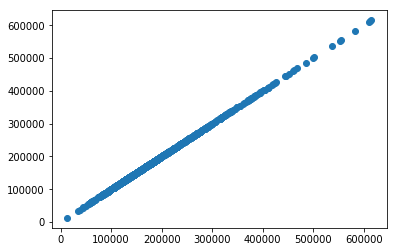

In [68]:
import matplotlib.pyplot as plt
plt.scatter(train_y,p_prc_train)
plt.show()

In [62]:
print((train_y-p_prc_train).sum())  
### *******This is quite shocking that he regression model predicts exactly the same value???
### it is not doing any prediction???

-1.19052856462e-08


In [63]:
p_prc_test=regr0.predict(test_X) # do some predicition

In [64]:
print((test_y-p_prc_test).sum())  

-1.53959263116e-08


In [70]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MS SubClass', 'MS Zoning',
       'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'G